Manual determination of threshold

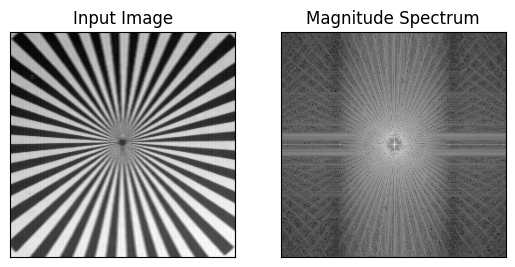

<ipython-input-1-deffd9adb1cc>:19: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img.ravel(),256,[0,256])


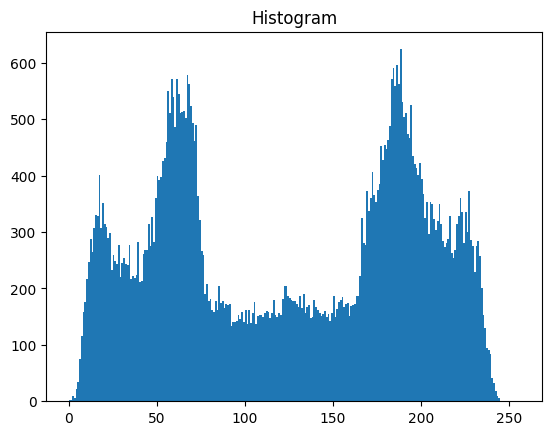

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('testpat1.tif', 0)

# Magnitude spectrum of the image
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

# histogram of the image
plt.hist(img.ravel(),256,[0,256])
plt.title('Histogram')
plt.show()

For segmentation we can use the function cv.threshold() which will segment the input image with thresholds that are given as a second input parameter.

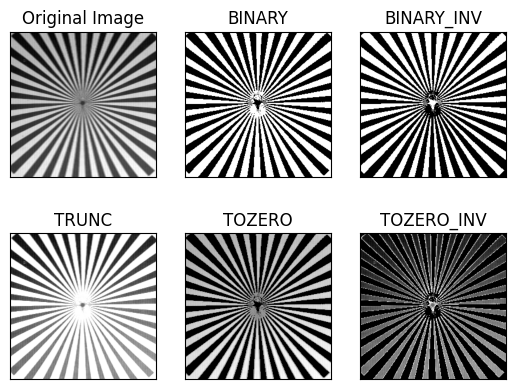

In [ ]:
# applying different thresholding tecniques on the input image
# all pixels value above 120 will be set to 255
ret, thresh1 = cv.threshold(img, 120, 255, cv.THRESH_BINARY)
ret, thresh2 = cv.threshold(img, 120, 255, cv.THRESH_BINARY_INV)
ret, thresh3 = cv.threshold(img, 120, 255, cv.THRESH_TRUNC)
ret, thresh4 = cv.threshold(img, 120, 255, cv.THRESH_TOZERO)
ret, thresh5 = cv.threshold(img, 120, 255, cv.THRESH_TOZERO_INV)

titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

Adaptive Thresholding

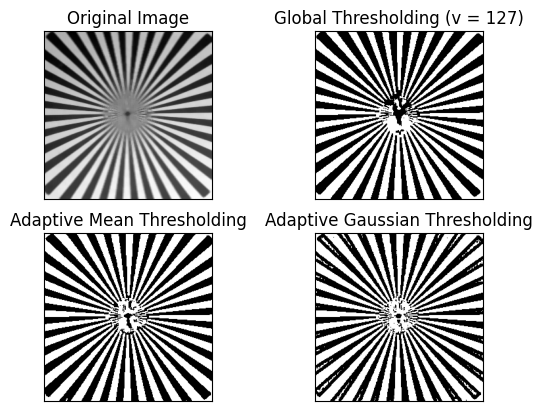

In [ ]:
img = cv.imread('testpat1.tif', 0)
img = cv.medianBlur(img, 5)
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)

th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

Automatic determination of the threshold

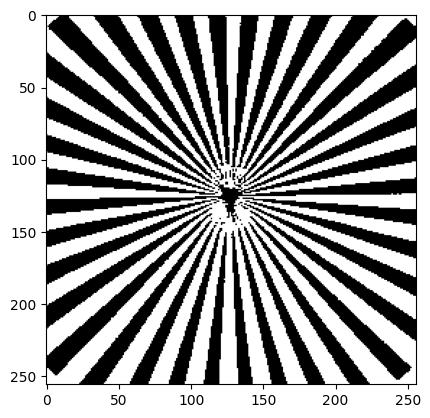

In [ ]:
img = cv.imread('testpat1.tif', 0)
reshapedImage = np.float32(img.reshape((img.size, 1)))
numberOfClusters = 2
stopCrireria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)

ret, label, clusters = cv.kmeans(reshapedImage, numberOfClusters, None, stopCrireria, 10, cv.KMEANS_RANDOM_CENTERS)
clusters = np.uint8(clusters)
intermediateImage = clusters[label.flatten()]
clusteredImage = intermediateImage.reshape((img.shape))
plt.imshow(clusteredImage, cmap = 'gray')

Extraction of edges ( Canny Edge Detection )

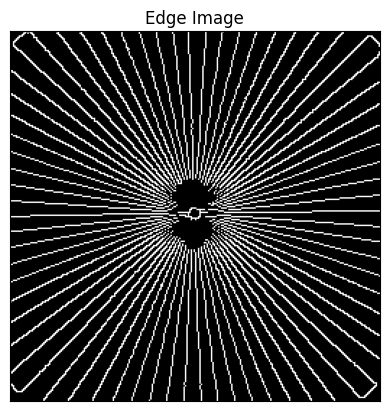

In [ ]:
img = cv.imread('testpat1.tif', 0)
edges = cv.Canny(img, 100, 200)
plt.imshow(edges, cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

Texture segmentation

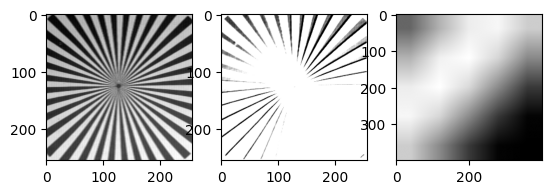

In [ ]:
img = cv.imread('testpat1.tif', 0)

ksize = 5
sigma = 5
theta = 1 * np.pi/4
lamda = 1 * np.pi/4
gamma = 0.9
phi = 0.8

kernel = cv.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi, ktype=cv.CV_32F)
fimg = cv.filter2D(img, cv.CV_8UC3, kernel)

kernel_resized = cv.resize(kernel, (400, 400))
plt.subplot(1, 3, 1), plt.imshow(img, cmap='gray')
plt.subplot(1, 3, 2), plt.imshow(fimg, cmap='gray')
plt.subplot(1, 3, 3), plt.imshow(kernel_resized, cmap='gray')
plt.show()

Image Inpainting

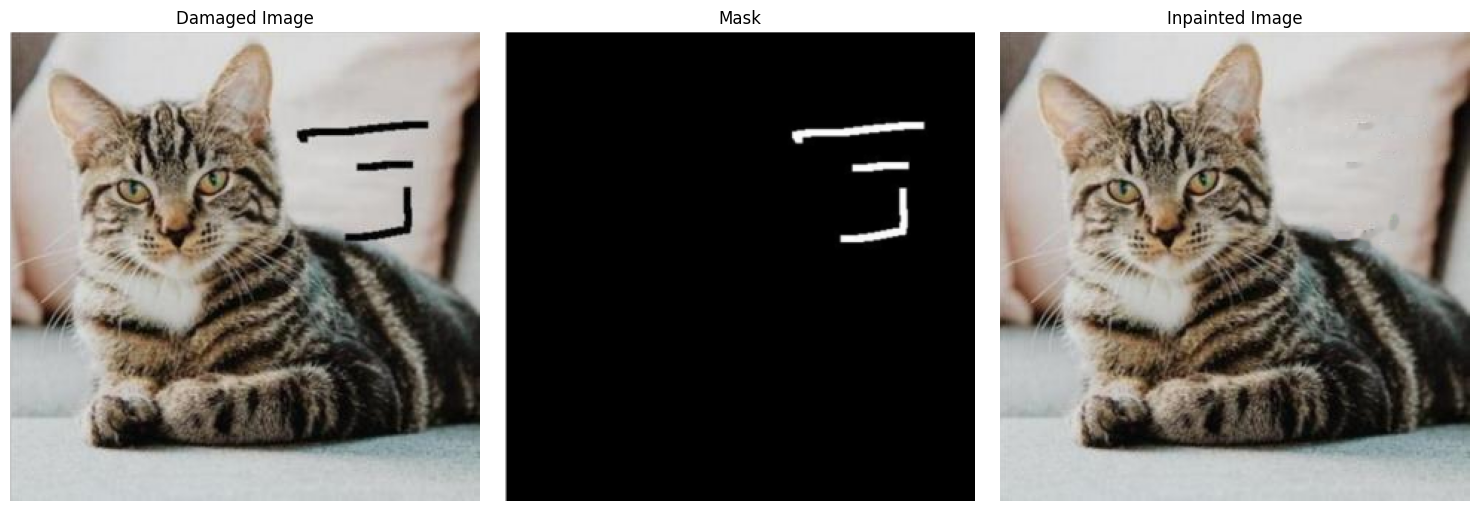

In [ ]:
# Load the damaged image
img = cv.imread('cat_damaged.png')

# Load the mask in grayscale mode
mask = cv.imread('cat_mask.png', cv.IMREAD_GRAYSCALE)

# Ensure the mask size matches the image size
if img.shape[:2] != mask.shape:
    mask = cv.resize(mask, (img.shape[1], img.shape[0]), interpolation=cv.INTER_NEAREST)

# Perform inpainting
dst = cv.inpaint(img, mask, 3, cv.INPAINT_NS)

# Convert images for display
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
dst_rgb = cv.cvtColor(dst, cv.COLOR_BGR2RGB)

# Display all images using plt.subplot()
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title("Damaged Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(mask, cmap="gray")
plt.title("Mask")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(dst_rgb)
plt.title("Inpainted Image")
plt.axis("off")

plt.tight_layout()
plt.show()

Exercise

1. Read the image texture.tif. Display the image. How many textures are there in the
image? Describe them.

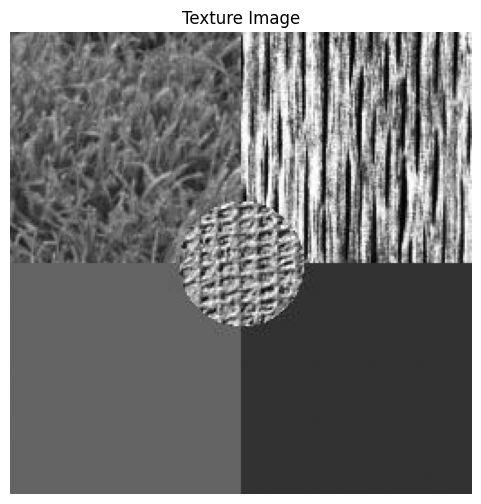

In [ ]:
# Load the image in grayscale
image_path = "texture.tif"
img = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(img, cmap='gray')
plt.title("Texture Image")
plt.axis("off")
plt.show()

There are five textures.

2. Select several features and calculate them on blocks of size of 12 × 12 using Gabor
filter. Display the calculated features and estimate which ones can be used to segment
given structure.

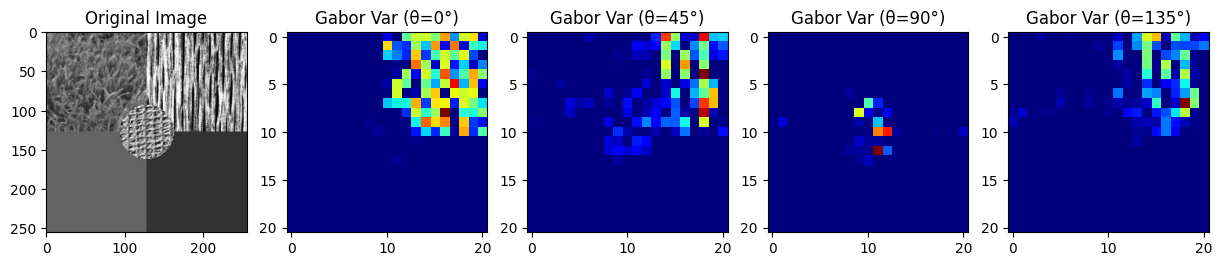

In [48]:
# Load image
img = cv.imread('texture.tif', 0)
h, w = img.shape

# Gabor filter parameters
ksize = 5
sigma = 5
lamda = np.pi / 4
gamma = 0.9
phi = 0.8
orientations = [0, np.pi/4, np.pi/2, 3*np.pi/4]  # Different orientations

# Create Gabor filter responses
responses = []
for theta in orientations:
    kernel = cv.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi, ktype=cv.CV_32F)
    filtered = cv.filter2D(img, cv.CV_8UC3, kernel)
    responses.append(filtered)

# Block processing: Compute variance in 12x12 blocks
block_size = 12
feature_maps = []
for response in responses:
    feature_map = np.zeros((h // block_size, w // block_size))  # Store feature values
    for i in range(0, h, block_size):
        for j in range(0, w, block_size):
            block = response[i:i+block_size, j:j+block_size]
            if block.shape[0] == block_size and block.shape[1] == block_size:
                feature_map[i//block_size, j//block_size] = np.var(block)  # Using variance as a feature
    feature_maps.append(feature_map)

# Display results
fig, axes = plt.subplots(1, len(orientations)+1, figsize=(15, 5))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original Image')

for i, fm in enumerate(feature_maps):
    axes[i+1].imshow(fm, cmap='jet')
    axes[i+1].set_title(f'Gabor Var (θ={orientations[i]*180/np.pi:.0f}°)')

plt.show()

  For the selected images apply the K-means method and comment on the result

3. Calculate the spectra energy (without the DC component) feature on the texture.tif
image, on the blocks of size 12×12. Is this feature good for segmentation of the textures
on this image?

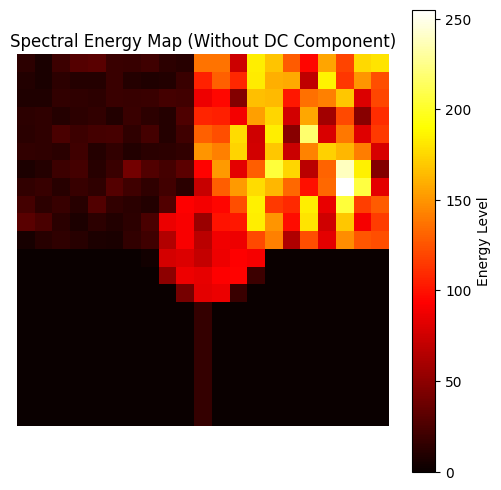

In [ ]:
# Load the texture image
image = cv.imread('texture.tif', cv.IMREAD_GRAYSCALE)

# Define block size
block_size = 12

# Function to compute spectral energy (without DC component)
def compute_spectral_energy(image, block_size):
    h, w = image.shape
    energy_map = np.zeros((h // block_size, w // block_size))

    for i in range(0, h - block_size + 1, block_size): # Adjust loop range
        for j in range(0, w - block_size + 1, block_size): # Adjust loop range
            block = image[i:i + block_size, j:j + block_size]

            # Compute the Fourier Transform
            f_transform = np.fft.fft2(block)
            f_transform_shifted = np.fft.fftshift(f_transform)

            # Remove DC component (center pixel)
            center_x, center_y = block_size // 2, block_size // 2
            f_transform_shifted[center_x, center_y] = 0

            # Compute spectral energy (sum of squared magnitudes)
            spectral_energy = np.sum(np.abs(f_transform_shifted) ** 2)
            energy_map[i // block_size, j // block_size] = spectral_energy

    return energy_map

# Compute spectral energy map
spectral_energy_map = compute_spectral_energy(image, block_size)

# Normalize for better visualization
normalized_energy_map = (spectral_energy_map - np.min(spectral_energy_map)) / (np.max(spectral_energy_map) - np.min(spectral_energy_map)) * 255
normalized_energy_map = normalized_energy_map.astype(np.uint8)

plt.figure(figsize=(6, 6))
plt.imshow(normalized_energy_map, cmap='hot')
plt.title("Spectral Energy Map (Without DC Component)")
plt.colorbar(label="Energy Level")
plt.axis("off")
plt.show()

If the energy map shows clear differences between textures, then spectral energy is a good feature for segmentation. However, if the textures have similar spectral energy values, it becomes less useful for distinguishing between them. Spectral energy is particularly effective when applied to textures with distinct frequency patterns, such as differentiating between rough and smooth textures, where variations in spectral components are more pronounced.

Segment the energy image using the K-means method and comment on the results.

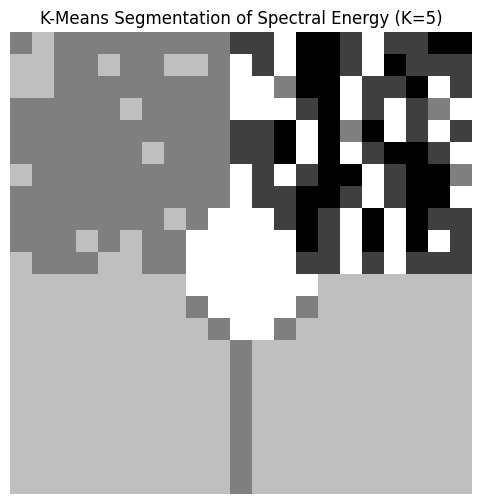

In [ ]:
# Reshape energy map for K-means clustering
reshaped_energy = spectral_energy_map.reshape((-1, 1)).astype(np.float32)

# Define number of clusters (adjust based on textures)
K = 5  # Change this based on the number of expected textures

# Define K-means criteria (stop at 100 iterations or accuracy of 0.1)
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.1)

# Apply K-means
_, labels, centers = cv.kmeans(reshaped_energy, K, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

# Convert clustered labels back into image shape
segmented_energy_image = labels.reshape(spectral_energy_map.shape)

# Normalize for better visualization
segmented_energy_image = (segmented_energy_image * 255 / (K - 1)).astype(np.uint8)

plt.figure(figsize=(6,6))
plt.imshow(segmented_energy_image, cmap='gray')
plt.title(f"K-Means Segmentation of Spectral Energy (K={K})")
plt.axis("off")
plt.show()

The segmentation clearly seperates textures. So the spectral energy is a goood feature.

4. By using segmentation and cv2.inpaint restore the “Efac.jpg” image. In your report explain the steps you used to achieve it.

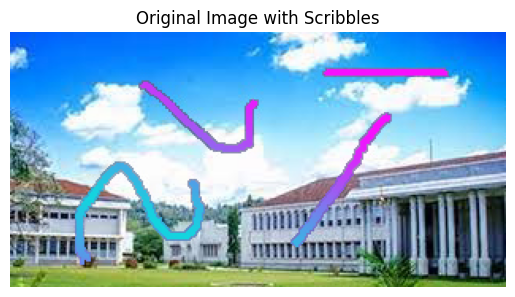

In [ ]:
# Load the original image
image_path = "Efac.jpg"
image = cv.imread(image_path)

# Convert to RGB for displaying properly in matplotlib
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.title("Original Image with Scribbles")
plt.axis("off")
plt.show()

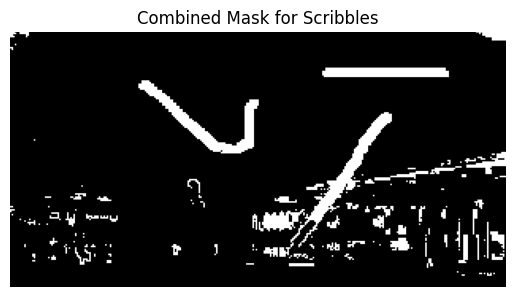

In [ ]:
# Convert to HSV color space
hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)

# Define multiple color ranges
lower_blue = np.array([110, 50, 50])
upper_blue = np.array([130, 255, 255])

lower_purple = np.array([130, 50, 50])
upper_purple = np.array([150, 255, 255])

lower_pink = np.array([150, 50, 50])
upper_pink = np.array([170, 255, 255])

# Create masks for each color
mask_blue = cv.inRange(hsv, lower_blue, upper_blue)
mask_purple = cv.inRange(hsv, lower_purple, upper_purple)
mask_pink = cv.inRange(hsv, lower_pink, upper_pink)

# Combine masks using bitwise OR
final_mask = cv.bitwise_or(mask_blue, cv.bitwise_or(mask_purple, mask_pink))

# Show the final mask
plt.imshow(final_mask, cmap="gray")
plt.title("Combined Mask for Scribbles")
plt.axis("off")
plt.show()

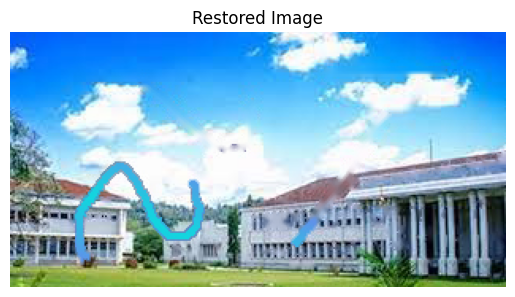

In [ ]:
# Apply inpainting
restored_image = cv.inpaint(image, mask, inpaintRadius=3, flags=cv.INPAINT_TELEA)

# Convert to RGB for displaying
restored_image_rgb = cv.cvtColor(restored_image, cv.COLOR_BGR2RGB)

plt.imshow(restored_image_rgb)
plt.title("Restored Image")
plt.axis("off")
plt.show()

Load the image

Create a mask by identifing the scribbles using HSV color segmentation

Apply inpainting